Mandelbrot Set
========

# Theory
It is a two-dimensional set with a relatively simple definition that exhibits a fractal structures, as it is magnified.

## Definition
Given this iterative formula
$$
\begin{equation}
z_{n+1} = z_n^2 + c
\end{equation}$$
 
The mandelbrot set is the set of numbers $c$ on the complex plane that cause the following iterative formula to remain bounded through all $n > 0$ when $z_0 = 0$, specifically $|z_n| \leq 2$. 

## Examples
Find if the following numbers $c = \lbrace 1, -1 \rbrace$ belong to mandelbrot set.
- $c = 1$
$$
\begin{align*}
z_1 &= z_0^2 + 1 = (0)^2 + 1 = 1 \\[5pt]
z_2 &= z_1^2 + 1 = (1)^2 + 1 = 2 \\[5pt]
z_3 &= z_2^2 + 1 = (2)^2 + 1 = 5 \\[5pt]
z_4 &= z_3^2 + 1 = (5)^2 + 1 = 26
\end{align*}$$
The sequence is unbounded and it will eventually will diverge to infinity

- $c = -1$
$$
\begin{align*}
z_1 &= z_0^2 + 1 = (0)^2 + (-1) = -1 \\[5pt]
z_2 &= z_1^2 + 1 = (-1)^2 + (-1) = 0 \\[5pt]
z_3 &= z_2^2 + 1 = (0)^2 + (-1) = -1 \\[5pt]
z_4 &= z_3^2 + 1 = (-1)^2 + (-1) = 0 
\end{align*}$$
The sequence will remain bounded by $|z_n| \leq 1$

# Implementation
The approach is to create $2D$ grid in the complex plane using `numpy` and then test which of complex numbers in the plane belong to the mandelbrot set. The complex plane vector would read
$$
\begin{bmatrix}
    [\; c_{11}  & \dots   &  c_{1n} \;]   \\
                                          \\
                & \vdots  &               \\
                                          \\
    [\; c_{n1}  & \dots   &  c_{nn} \;]   \\
\end{bmatrix}
$$

$
\text{where} \\
\begin{array}{l l}
    \qquad c &: \text{Complex number}\\
    \qquad n &: \text{Number of complex numbers in each axis of the complex plane}
\end{array}
$

Then we pass through each complex number in complex plane vector and do the iterative test provided by the iterative formula in mandelbrot set definition.

## Imports

In [1]:
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [2]:
re_range = [-2,2]    # real axis range
im_range = [-2,2]    # imaginary axis range
res = 256            # resolution

## Algorithm
```mermaid
    flowchart LR

    get(Get Complex plane) --> Loop

    subgraph Loop[Loop over Numbers in Complex Plane]
    direction LR
        number(Complex number z) --> condition{Is iterative formula 1.0 \n bounded when c is used?}
        condition --> |Yes| mandelbrot(Consider c to mandelbrot set)
        condition --> |No| no_mandelbrot(Don't consider c)
    end

    Loop --> set(Mandelbrot set)


```

In [3]:
def mandelbrot_set(cs: list[list[complex]], maxiter: int = 32) -> tuple[list[complex], list[list[bool]]]:
    '''
    Compute the mandelbrot set that is contained in a complex plane defined by argument `cs`

    Args:
        cs: list of complex numbers that define a complex plane
        maxiter: maximum iteration of the iterative formula. Defaults to 32.

    Returns:
        The mandelbrot set and the 2d array that hold the information of the set in the complex plane
    '''

    imag = np.zeros_like(cs, dtype=int)
    set=[]
    for i, C in enumerate(cs): 
        for j, c in enumerate(C):   
            z = 0
            for k in range(maxiter):
                z = z**2 + c

                if np.abs(z) > 2:
                    imag[i][j] = k
                    break
            if np.abs(z) > 2:
                continue

            # imag[i][j] = True
            set.append(z)

    return set, imag

## Results Visualization
This section aims to illustrate the fractal nature of mandelbrot set. This is done with the following visualizations
- Complex Plane Plot: In the complex plane, we highlight the complex numbers that belong mandelbrot set.

In [4]:
# construct complex plane
re_axis = np.linspace(*re_range, int((re_range[1] - re_range[0]) * res))
im_axis = np.linspace(*im_range, int((im_range[1] - im_range[0]) * res))
complex_plane = re_axis[np.newaxis, :] + im_axis[:, np.newaxis] * 1j

# compute the mandelbrot set
_, imag = mandelbrot_set(cs=complex_plane)

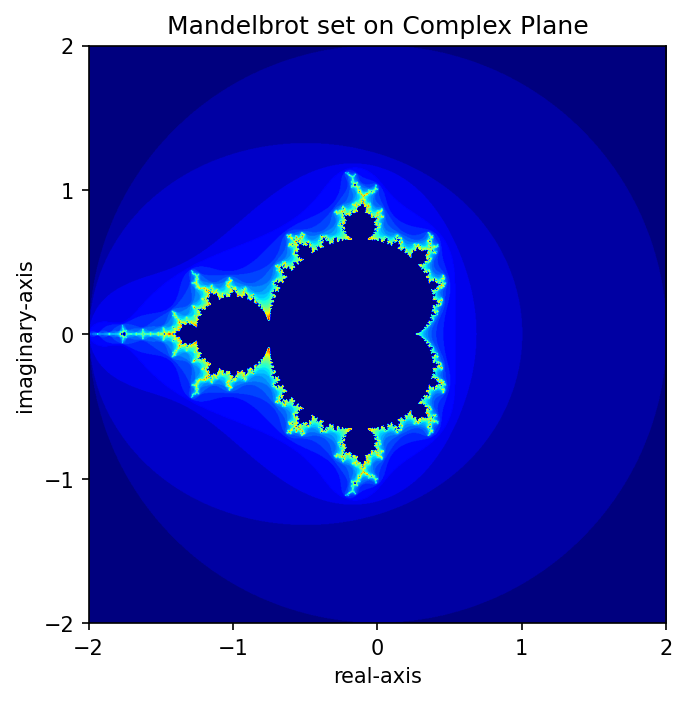

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=150)

# 2d plot of the mandelbrot set
ax.imshow(imag, cmap="jet", extent=[-2,2,-2,2])
ax.set(xlabel="real-axis", ylabel="imaginary-axis", title="Mandelbrot set on Complex Plane")

plt.locator_params(nbins=4)
plt.show()